In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage as ndimage
from skimage import restoration

## Creating a sample image

(np.float64(-0.5), np.float64(14.5), np.float64(14.5), np.float64(-0.5))

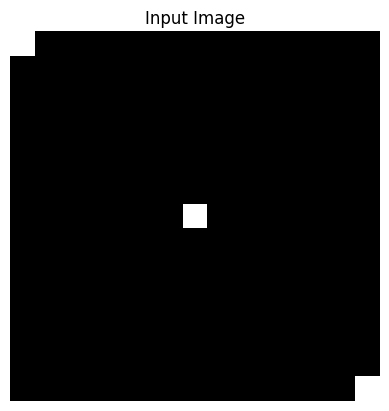

In [103]:
side = 15
x = np.zeros((side, side), dtype=np.float32)
x[0, 0] = 1.0
x[side//2, side//2] = 1.0
x[side-1, side-1] = 1.0
plt.imshow(x, cmap='gray')
plt.title('Input Image')
plt.axis('off')

## Creating the blur kernels

(np.float64(-0.5), np.float64(2.5), np.float64(2.5), np.float64(-0.5))

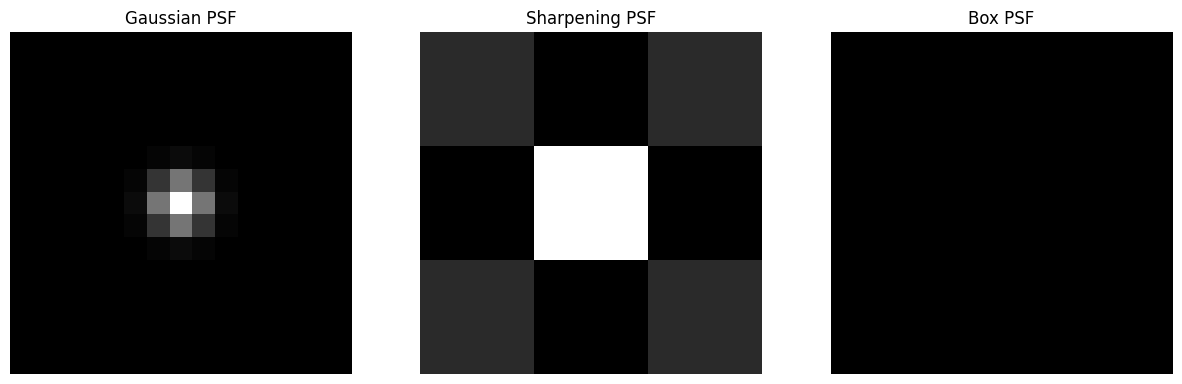

In [ ]:
def gaussian_kernel(size, sigma):
    """Generates a Gaussian kernel."""
    # From ChatGPT
    ax = np.linspace(-(size // 2), size // 2, size)     # Create range of values centered around 0. len(ax) = size
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

def sharpen():
    return np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]], dtype=np.float32)

def box_blur():
    return np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]], dtype=np.float32) / 9.0

psf_gauss = gaussian_kernel(side, sigma=0.8)
psf_sharp = sharpen()
psf_box = box_blur()
fig1, arr = plt.subplots(1, 3 ,figsize=(15, 10))
arr[0].imshow(psf_gauss, cmap='gray')
arr[0].set_title('Gaussian PSF')
arr[0].axis('off')
arr[1].imshow(psf_sharp, cmap='gray')
arr[1].set_title('Sharpening PSF')
arr[1].axis('off')
arr[2].imshow(psf_box, cmap='gray')
arr[2].set_title('Box PSF')
arr[2].axis('off')

## Convolving Image with the blur kernels

(np.float64(-0.5), np.float64(14.5), np.float64(14.5), np.float64(-0.5))

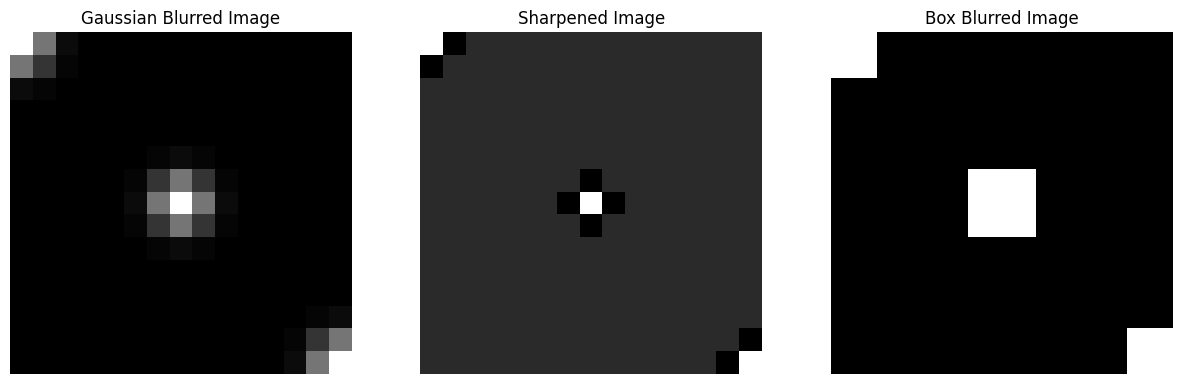

In [127]:
blurred_gauss = scipy.signal.convolve2d(x, psf_gauss, "same", boundary="fill", fillvalue=0.0)
blurred_sharp = scipy.signal.convolve2d(x, psf_sharp, "same", boundary="fill", fillvalue=0.0)
blurred_box = scipy.signal.convolve2d(x, psf_box, "same", boundary="fill", fillvalue=0.0)

fig2, arr = plt.subplots(1, 3 ,figsize=(15, 10))
arr[0].imshow(blurred_gauss, cmap='gray')
arr[0].set_title('Gaussian Blurred Image')
arr[0].axis('off')
arr[1].imshow(blurred_sharp, cmap='gray')
arr[1].set_title('Sharpened Image')
arr[1].axis('off')
arr[2].imshow(blurred_box, cmap='gray')
arr[2].set_title('Box Blurred Image')
arr[2].axis('off')

## Use Richardson-Lucy algorithm to deconvolve

(np.float64(-0.5), np.float64(14.5), np.float64(14.5), np.float64(-0.5))

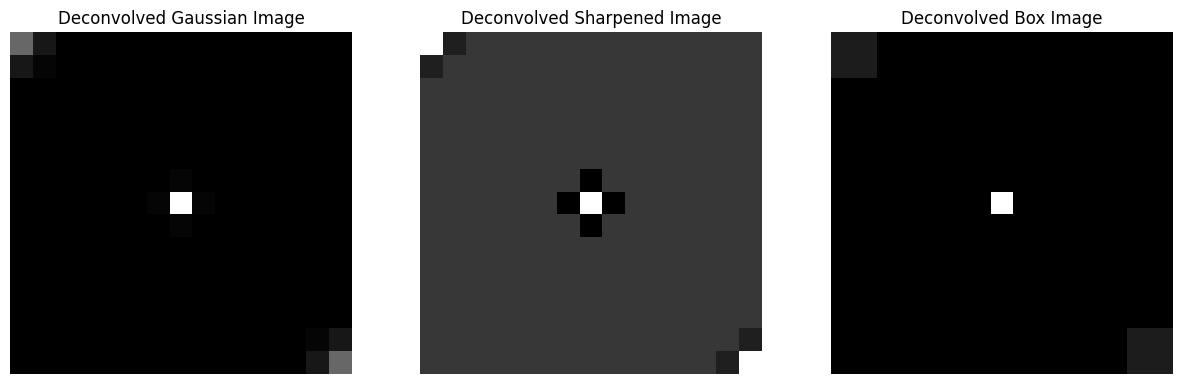

In [130]:
deconvolved_gauss = restoration.richardson_lucy(blurred_gauss, psf_gauss, num_iter=30)
deconvolved_sharp = restoration.richardson_lucy(blurred_sharp, psf_sharp, num_iter=30)
deconvolved_box = restoration.richardson_lucy(blurred_box, psf_box, num_iter=30)

fig3, arr = plt.subplots(1, 3 ,figsize=(15, 10))
arr[0].imshow(deconvolved_gauss, cmap='gray')
arr[0].set_title('Deconvolved Gaussian Image')
arr[0].axis('off')
arr[1].imshow(deconvolved_sharp, cmap='gray')
arr[1].set_title('Deconvolved Sharpened Image')
arr[1].axis('off')
arr[2].imshow(deconvolved_box, cmap='gray')
arr[2].set_title('Deconvolved Box Image')
arr[2].axis('off')